In [1]:
import numpy as np 
import pandas as pd
from statsmodels.stats.multitest import multipletests
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
from lifelines import KaplanMeierFitter
import seaborn as sns
from lifelines.statistics import multivariate_logrank_test

In [2]:
import mmrf_data_loader 

In [3]:
# Load clinical MMRF data
patient_list, patients_mask, event_duration, censorlist = mmrf_data_loader.load_MMRF_clinical_data()

659
10
659


In [4]:
rna_data, gene_list = mmrf_data_loader.load_rna_data(patients_mask)

length gene list:  8427
size of rna_data:  (8427, 659)


In [5]:
np.argwhere(gene_list == "WEE1") 

array([[8152]])

In [6]:
wee1_data = rna_data[8152, :]

In [7]:
wee1_data.shape

(659,)

In [8]:
np.percentile(wee1_data, 33) 

1.5870137125692672

In [9]:
np.percentile(wee1_data, 66) 

3.045438452374607

In [10]:
WEE1_low_mask = wee1_data < np.percentile(wee1_data, 33)
WEE1_high_mask = wee1_data > np.percentile(wee1_data, 66)
WEE1_mask = WEE1_low_mask + WEE1_high_mask
wee1_labels = 1*WEE1_low_mask + 3*WEE1_high_mask

In [11]:
subjectlist659 = pd.DataFrame({'ID': patient_list, 'label':wee1_labels, 'wee1_data': wee1_data})

In [12]:
subjectlist442 = subjectlist659[subjectlist659['label'].isin([1, 3])]

In [13]:
subjectlist442 = subjectlist442.reset_index()

In [14]:
event_duration = event_duration[WEE1_mask]
censorlist = censorlist[WEE1_mask]
wee1_labels = wee1_labels[WEE1_mask]

1 4.117808219178082  years
3 1.9698630136986301  years


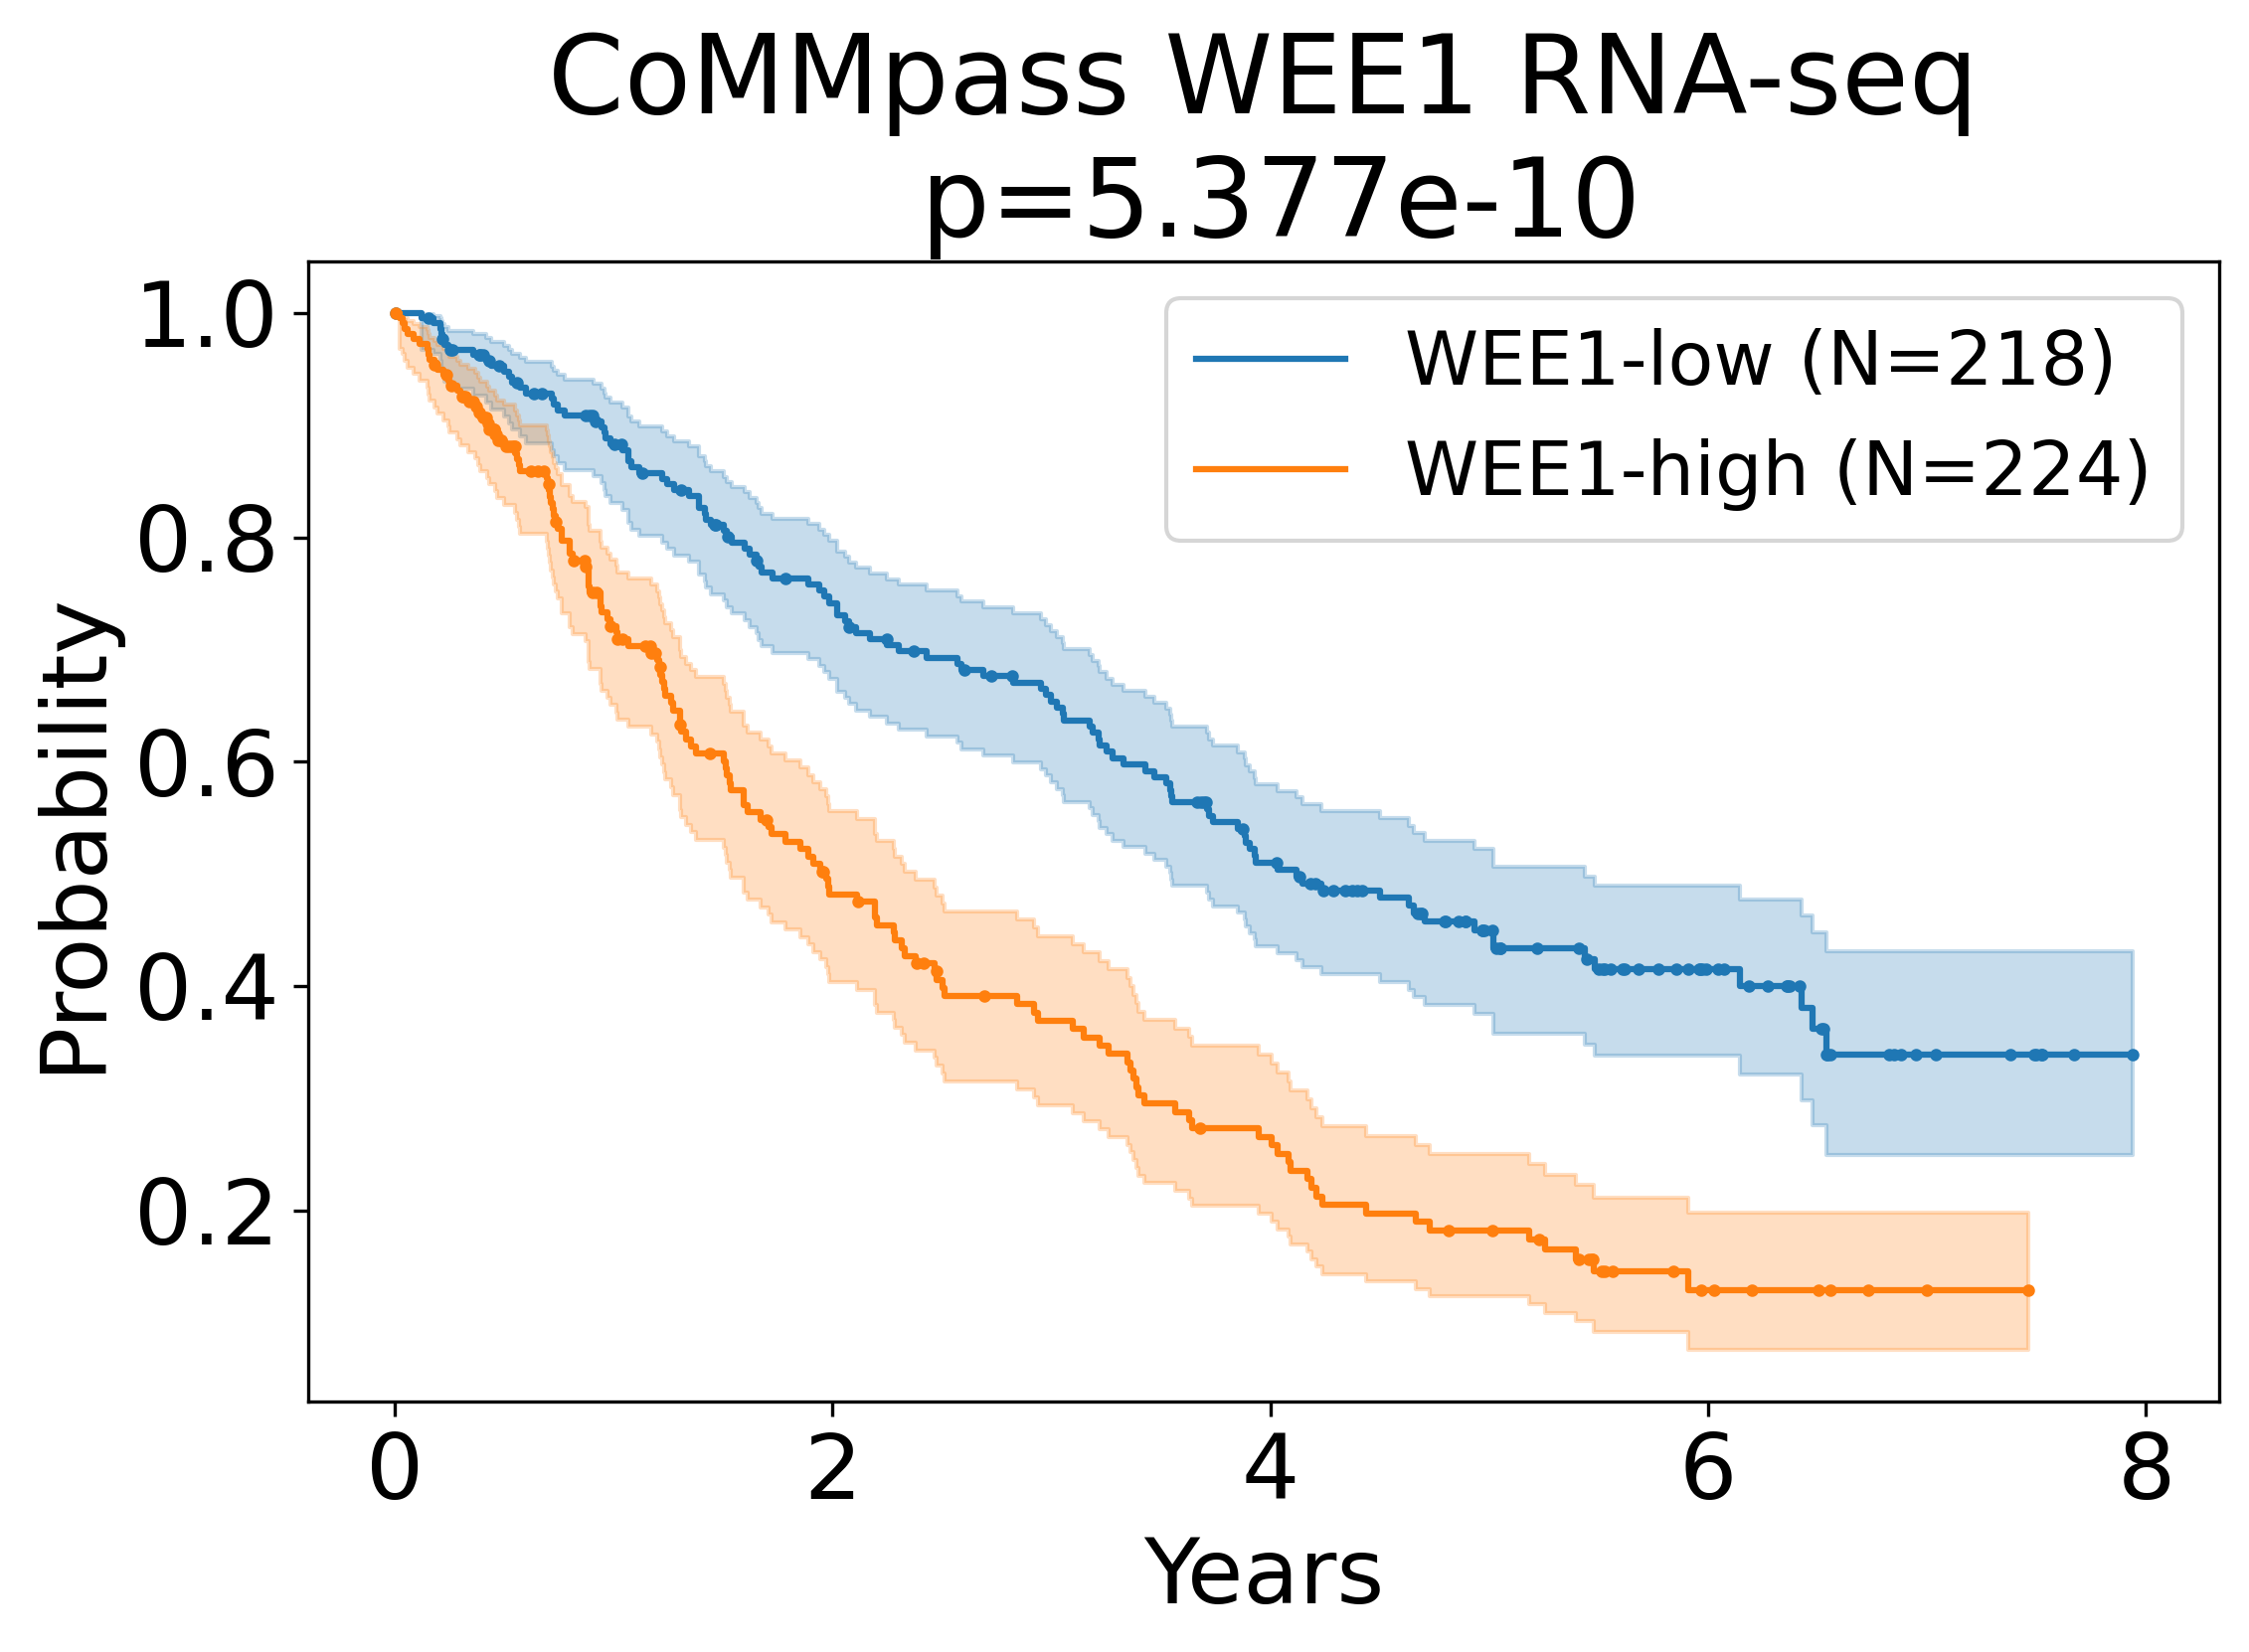

In [16]:
plt.figure(dpi=300, figsize=(8, 6))
ax = plt.subplot(111)

output = multivariate_logrank_test(event_duration, wee1_labels, censorlist)
label_list = ['empty', 'low', 'empty', 'high']
kmf = KaplanMeierFitter()
for ncluster in [1, 3]: 
    kmf.fit(event_duration[wee1_labels==ncluster],\
            censorlist[wee1_labels==ncluster],\
            label="WEE1-"+label_list[ncluster]+\
            " (N="+ str(sum(wee1_labels==ncluster)) +")")
    
    kmf.plot_survival_function(ax=ax,  show_censors=True,\
                               censor_styles={'ms': 2, 'marker': 'o'}, ci_show=True)
    print(ncluster, kmf.median_survival_time_, ' years')

plt.title("CoMMpass WEE1 RNA-seq\n p=" + "{:.3e}".format(output.p_value))
plt.xlabel('Years')
plt.ylabel('Probability')

plt.rcParams.update({'font.size': 22})
plt.legend(loc='upper right', fontsize="18")
plt.tight_layout()